In [2]:
import yaml
import h5py
import numpy as np
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import nibabel as nib
import pandas as pdx
from IPython.display import clear_output
from skimage.segmentation import find_boundaries
from skimage import morphology

In [2]:
#decon_mem = "/Users/dvarelat/Documents/MASTER/TFM/DATA/20190401_E2/20190401_E2_mGFP_decon.nii.gz"
#decon_nu = "/Users/dvarelat/Documents/MASTER/TFM/DATA/20190401_E2/20190401_E2_DAPI_decon.nii.gz"
#DECON_NUCLEI = nib.load(decon_nu).get_fdata()
#DECON_MEM = nib.load(decon_mem).get_fdata()

In [3]:
nuclei = "/Users/dvarelat/Documents/MASTER/TFM/DATA/CardiacRegion/20190401_E2_DAPI_CardiacRegion_0.5.nii.gz"
mem = "/Users/dvarelat/Documents/MASTER/TFM/DATA/CardiacRegion/20190401_E2_mGFP_CardiacRegion_0.5.nii.gz"

In [4]:
CR_NUCLEI = nib.load(nuclei).get_fdata()
CR_MEM = nib.load(mem).get_fdata()

In [6]:
print(CR_MEM.shape)
print(CR_NUCLEI.shape)

(881, 900, 480, 1)
(881, 900, 480, 1)


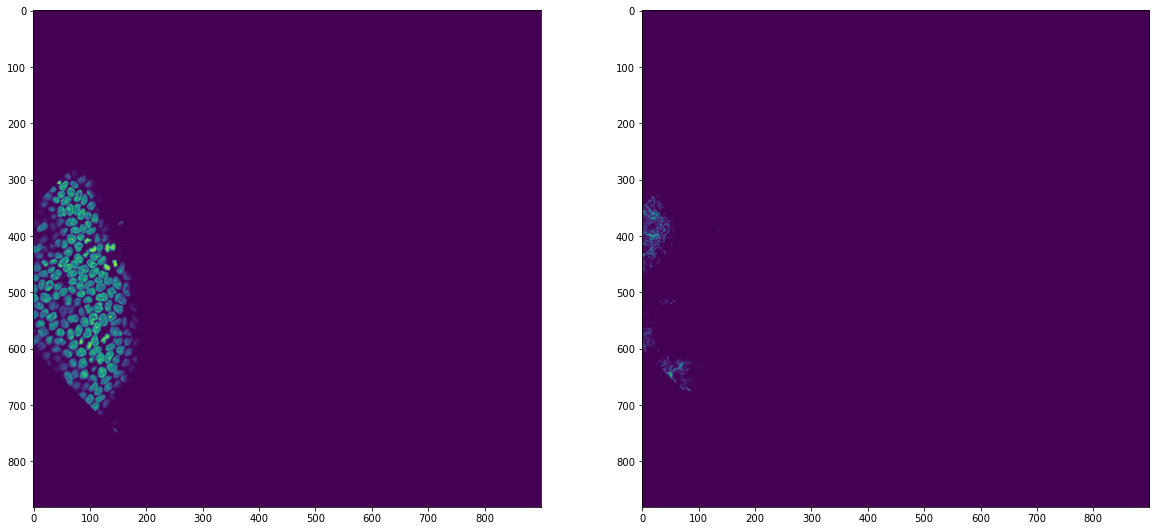

In [8]:
for t in range(48):
    plt.figure(figsize=(20,20)) 
    n = 10*t
    plots = [CR_NUCLEI[:, :, n, 0], CR_MEM[:, :, n, 0]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)
    break

## CHECK 3D-Unet

In [9]:
pred_mem = "/Users/dvarelat/Documents/MASTER/TFM/methods/pytorch3dunet/20190401_E2_mGFP_CardiacRegion_0.5_ZXY_predictions.h5"
#pred_mem = "/Users/dvarelat/Documents/MASTER/TFM/methods/pytorch3dunet/20190401_E2_mGFP_CardiacRegion_0.5_ZXY_predictions_pnas.nii.gz"

In [10]:
mem_pred = np.array(h5py.File(pred_mem, 'r')["predictions"])
mem_pred.shape

(1, 480, 881, 900)

In [11]:
mem_pred = mem_pred[0,:,:,:]
mem_pred.shape

(480, 881, 900)

In [71]:
pnas_pred = nib.load(pred_mem).get_fdata()
pnas_pred.shape

(1, 480, 881, 900)

In [55]:
pnas_pred =  np.swapaxes(np.swapaxes(pnas_pred[0,:,:,:], 0, 2), 0, 1)
pnas_pred.shape

(881, 900, 480)

In [12]:
mem_pred.shape

(480, 881, 900)

In [13]:
labels_mem = (mem_pred > 0.4).astype('float64')

In [89]:
np.swapaxes(np.swapaxes(labels_mem, 0, 2), 0, 1).shape

(881, 900, 480)

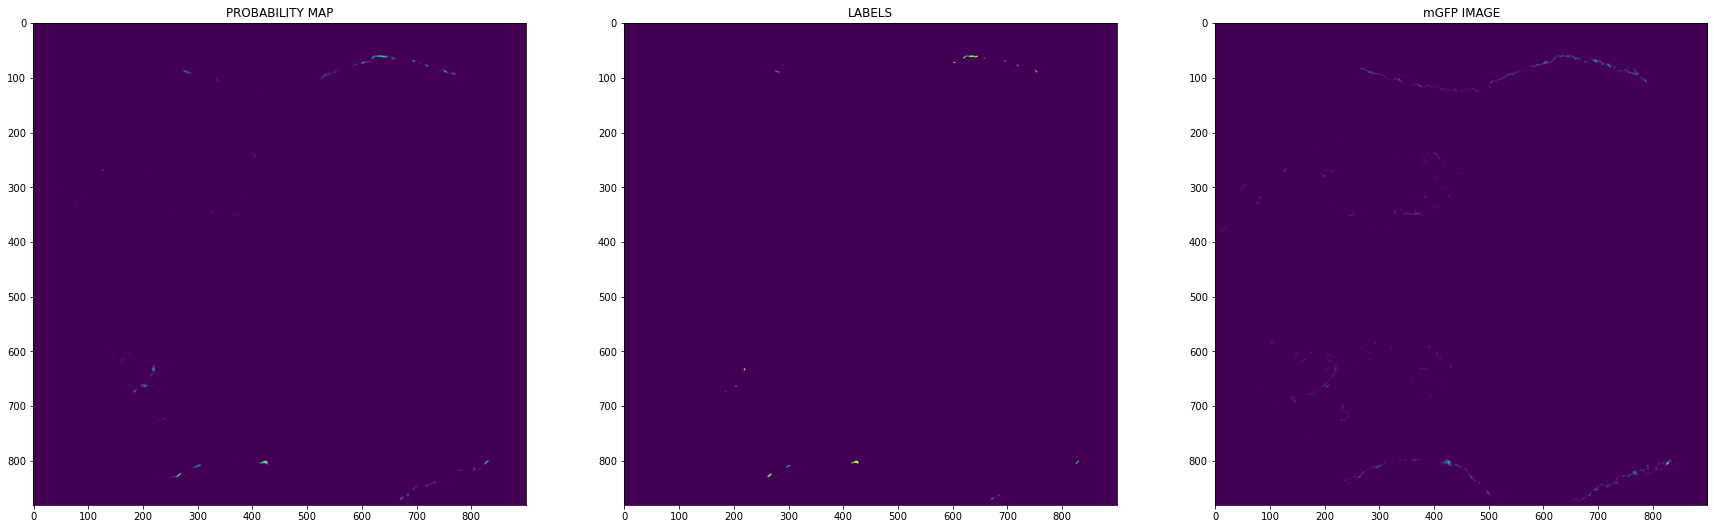

In [14]:
for t in range(48):
    plt.figure(figsize=(30,30)) 
    n = 10*t
    plots = [mem_pred[n, :, :], labels_mem[n, :, :], CR_MEM[:, :, n, 0]]
    titles = ["PROBABILITY MAP", "LABELS" , "mGFP IMAGE"]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1).set_title(titles[i]) 
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

### GUARDAR

In [90]:
ni_img = nib.Nifti1Image(np.swapaxes(np.swapaxes(labels_mem, 0, 2), 0, 1).astype('uint16'), affine=np.eye(4))
nib.save(ni_img, "/Users/dvarelat/Documents/MASTER/TFM/methods/pytorch3dunet/20190401_E2_mGFP_CardiacRegion_0.5_XYZ_labels.nii.gz")

## GASP

In [25]:
# closed = morphology.binary_closing(labels_mem, footprint=np.ones((10,10,10)))

In [16]:
CR_MEM.shape

(881, 900, 480, 1)

In [17]:
gasp = "/Users/dvarelat/Documents/MASTER/TFM/methods/postpro/20190401_E2_mGFP_CardiacRegion_0.5_ZXY_predictions_gasp.nii.gz"


In [18]:
gasp_pred = nib.load(gasp).get_fdata()
gasp_pred = np.swapaxes(gasp_pred, 0, 1)
gasp_pred.shape

(881, 900, 480)

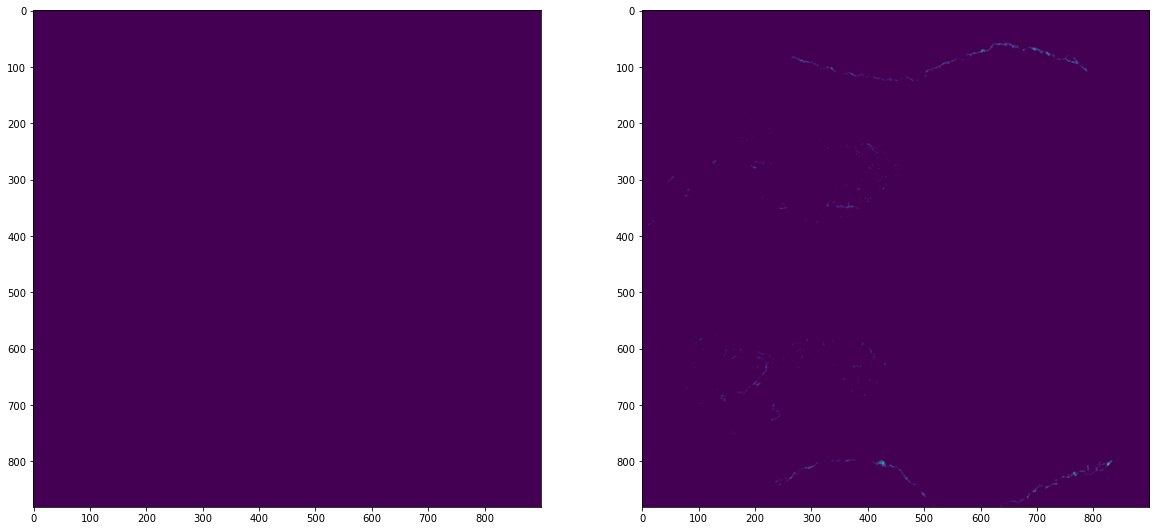

In [19]:
for t in range(48):
    plt.figure(figsize=(20,20)) 
    n = 10*t
    plots = [gasp_pred[:, :, n], CR_MEM[:, :, n, 0]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

In [14]:
ni_img = nib.Nifti1Image(gasp_pred.astype('uint16'), affine=np.eye(4))
nib.save(ni_img, "/Users/dvarelat/Documents/MASTER/TFM/methods/postpro/20190401_E2_mGFP_CardiacRegion_0.5_XYZ_predictions_gasp.nii.gz")


## MULTICUT

In [24]:
multicut = "/Users/dvarelat/Documents/MASTER/TFM/methods/postpro/20190401_E2_mGFP_CardiacRegion_0.5_XYZ_predictions_multicut.nii.gz"


In [25]:
multi_pred = nib.load(multicut).get_fdata()
multi_pred.shape

(881, 900, 480)

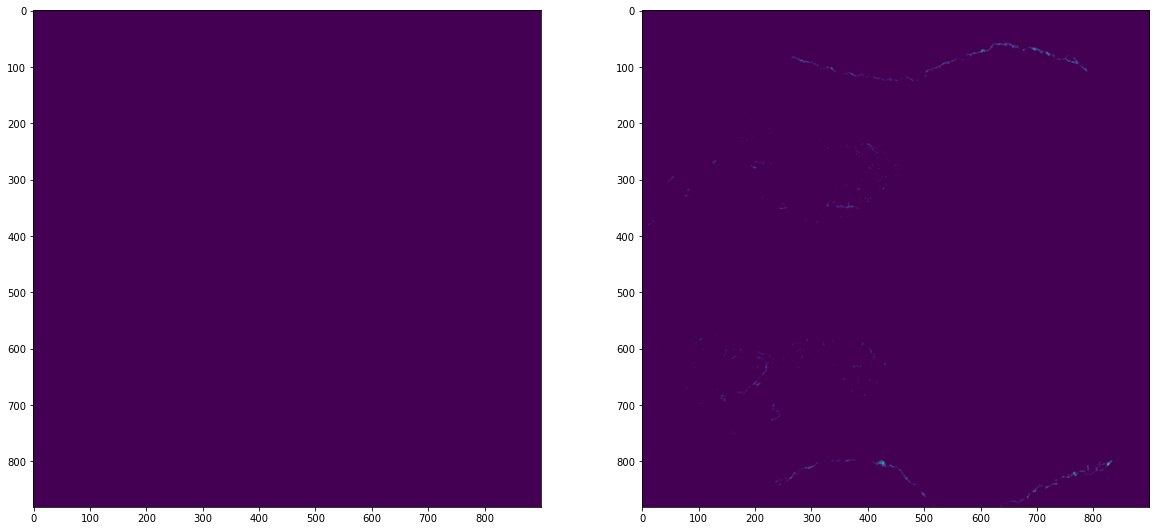

In [26]:
for t in range(48):
    plt.figure(figsize=(20,20)) 
    n = 10*t
    plots = [multi_pred[:, :, n], CR_MEM[:, :, n, 0]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

### MULTICUT VS GASP

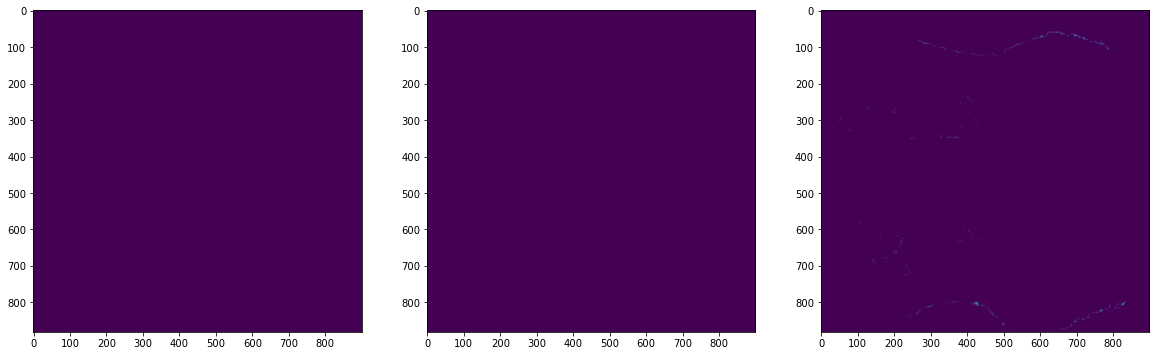

In [27]:
for t in range(48):
    plt.figure(figsize=(20,20)) 
    n = 10*t
    plots = [gasp_pred[:, :, n], multi_pred[:, :, n], CR_MEM[:, :, n, 0]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

## NUCLEI

In [30]:
pred_nu = "/Users/dvarelat/Documents/MASTER/TFM/methods/mycellpose/20190401_E2_DAPI_CardiacRegion_0.5_MASKZYX.nii.gz"

In [29]:
nuclei_pred = nib.load(pred_nu).get_fdata()
nuclei_pred.shape

(480, 881, 900)

In [31]:
CR_NUCLEI.shape

(881, 900, 480, 1)

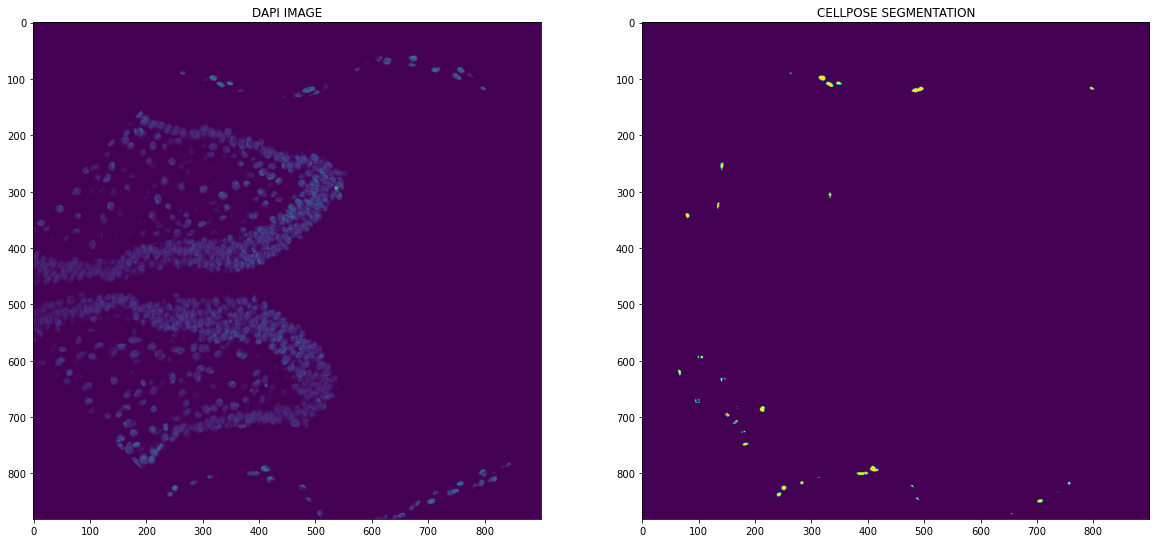

In [33]:
for t in range(48):
    plt.figure(figsize=(20,20)) 
    n = 10*t
    plots = [CR_NUCLEI[:, :, n, 0], nuclei_pred[n, :, :]]
    titles = ["DAPI IMAGE", "CELLPOSE SEGMENTATION"]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1).set_title(titles[i]) 
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

In [34]:
ni_img = nib.Nifti1Image(np.swapaxes(np.swapaxes(nuclei_pred.astype('uint16'),0,2), 0, 1), affine=np.eye(4))
nib.save(ni_img, "/Users/dvarelat/Documents/MASTER/TFM/methods/mycellpose/20190401_E2_DAPI_CardiacRegion_0.5_MASK_XYZ_new.nii.gz")